In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from jax import grad, jit
import jax.numpy as jnp

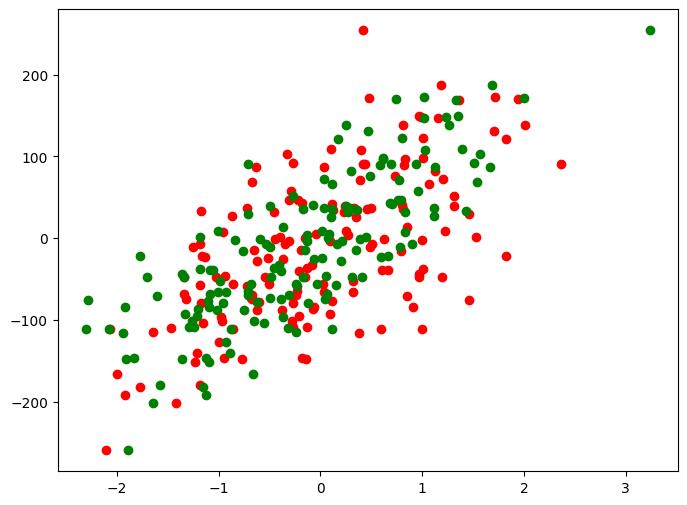

In [2]:
X,y= make_regression(n_samples = 150, n_features=  2, noise = 5) #Data generation
y=y.reshape((y.shape[0],1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15) #Splitting data
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, c='r')
plt.scatter(X[:,1], y, c='g')
plt.show()

In [3]:
def loss(w,b,X,y):
  pred = X.dot(w)+ b
  return ((pred-y)**2).mean()

In [4]:
Weights = jnp.zeros((X_train.shape[1],1))
bias = 0.
l_rate = 0.001
n_iter = 3000

In [5]:
gradW = jit(grad(loss, argnums=0))
gradb = jit(grad(loss,argnums=1))

In [6]:
for _ in range(n_iter):
  dW = gradW(Weights,bias,X_train,y_train)
  db = gradb(Weights,bias,X_train,y_train)
  print(loss(Weights,bias,X_train,y_train))
  Weights -= dW*l_rate
  bias-= db*l_rate

8265.463888077584
8232.268
8199.211
8166.295
8133.5176
8100.88
8068.379
8036.0156
8003.7896
7971.699
7939.745
7907.9253
7876.2407
7844.689
7813.271
7781.9854
7750.832
7719.8105
7688.9194
7658.158
7627.5273
7597.0254
7566.6523
7536.4062
7506.2896
7476.2983
7446.434
7416.695
7387.0815
7357.5933
7328.2285
7298.9873
7269.869
7240.874
7212.0
7183.248
7154.617
7126.1064
7097.7144
7069.4434
7041.2905
7013.256
6985.339
6957.5396
6929.857
6902.2905
6874.839
6847.503
6820.2812
6793.1753
6766.182
6739.3022
6712.534
6685.8794
6659.336
6632.904
6606.5825
6580.3716
6554.2695
6528.278
6502.394
6476.6196
6450.952
6425.3926
6399.94
6374.593
6349.353
6324.218
6299.1885
6274.2627
6249.442
6224.7246
6200.1104
6175.599
6151.19
6126.883
6102.6772
6078.572
6054.568
6030.664
6006.8594
5983.1543
5959.5483
5936.0405
5912.631
5889.318
5866.103
5842.9844
5819.962
5797.0356
5774.204
5751.4683
5728.8267
5706.28
5683.8257
5661.4663
5639.1987
5617.0244
5594.942
5572.951
5551.0522
5529.244
5507.5254
5485.8975
5464.360

In [7]:
loss(Weights, bias, X_test, y_test) #Model's Loss on test set

Array(30.009777, dtype=float32)

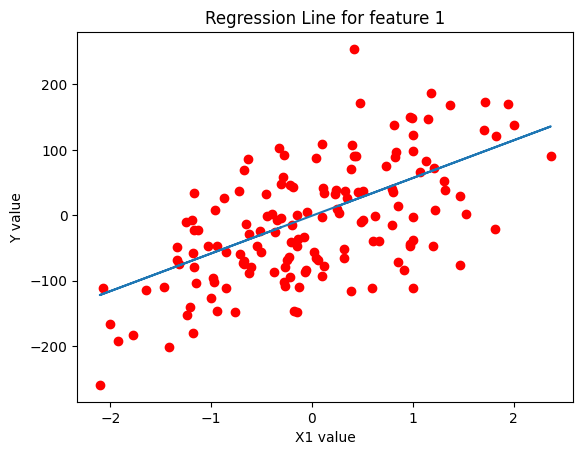

In [8]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 1")
ax.set_xlabel("X1 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,0], y, c='r')
plt.plot(X[:,0], X[:,0]*Weights[0]+bias)
plt.show()

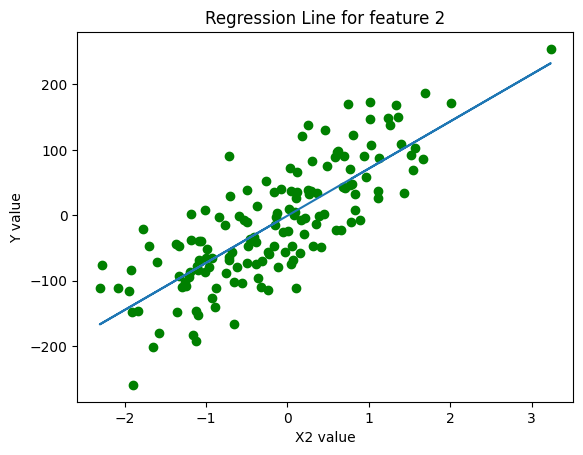

In [9]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 2")
ax.set_xlabel("X2 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,1], y, c='g')
plt.plot(X[:,1], X[:,1]*Weights[1]+bias)
plt.show()